In [1]:
import sys
sys.path.append("../")

from analysis import System as syst
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sagnac = syst("sagnac", ["../../data/20240626/cage_sagnac_phi82/iter_0.tdms"], channel = "Y")

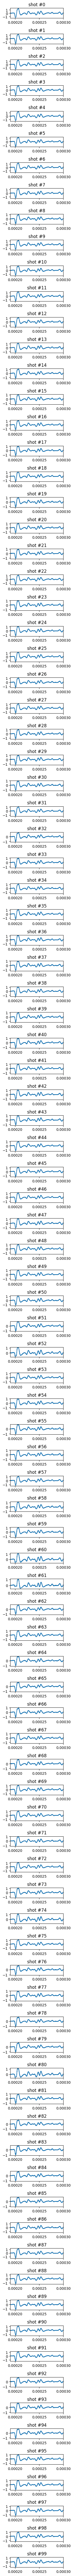

In [5]:
fig, ax = plt.subplots(len(sagnac.get_data()[0].collection) - 1, 1, figsize = (3, 100))
for i, c in enumerate(sagnac.get_data()[0].collection[1:]):
    ax[i].set_title("shot #" + str(i))
    ax[i].set_xlim([0.00019, 0.0003])
    ax[i].plot(c.t, c.x)
fig.tight_layout()
plt.show()

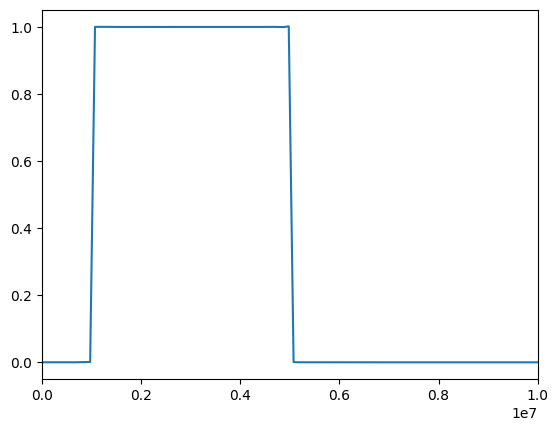

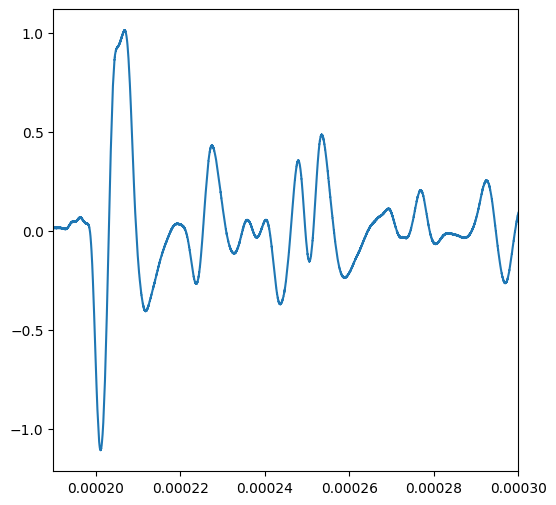

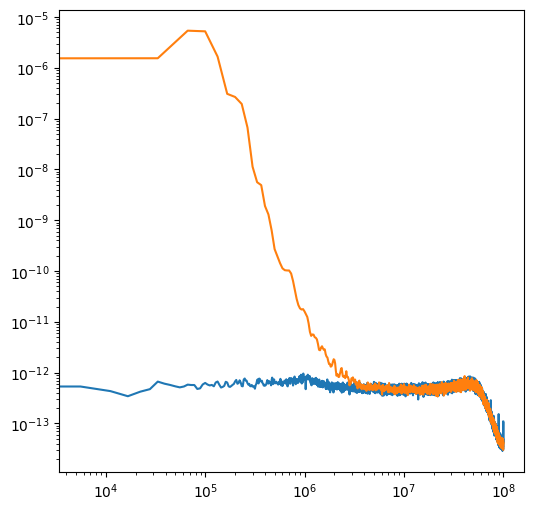

In [12]:
from scipy import signal as sig
sagnac.set_data(ind = 0)
NYQUIST = sagnac.get_data()[0].r / 2
def make_bandpass(taps, low, high, fs, p):
    from scipy import signal as sig
    return sig.firwin(taps, [low, high], fs = fs, pass_zero = p)
def apply_bandpass(data, taps, low, high, fs, p = "bandpass"):
    b = make_bandpass(taps, low, high, fs, p)
    return sig.filtfilt(b, [1], data)
taps = 10001
low = 1e6
high = 5e6
p = "bandpass"
fig, ax = plt.subplots(1, 1)
w, h = sig.freqz(make_bandpass(taps, low, high, NYQUIST, p), fs = NYQUIST)
ax.plot(w, np.abs(h))
ax.set_xlim([0, 1e7])
plt.show()
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

# sagnac.get_data()[0].apply("lowpass", cutoff = 10e6, inplace = True)
# sagnac.get_data()[0].apply("bin_average", Npts = int(sagnac.get_data()[0].r / (2 * 10e6)), inplace = True)
# sagnac.get_data()[0].apply("detrend", mode = "constant", inplace = True)

sagnac.get_data()[0].aggrigate(collection_slice = slice(1, len(sagnac.get_data()[0].collection), 1))
# sagnac.get_data()[0].agg.x = apply_bandpass(sagnac.get_data()[0].agg.x, taps, low, high, NYQUIST, p)

ax.set_xlim([0.00019, 0.0003])
ax.plot(sagnac.get_data()[0].agg.t, sagnac.get_data()[0].agg.x)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
# sagnac.set_data(ind = 0)
# sagnac.get_data()[0].apply("lowpass", cutoff = 10e6, inplace = True)
# sagnac.get_data()[0].apply("bin_average", Npts = int(sagnac.get_data()[0].r / (2 * 10e6)), inplace = True)
# sagnac.get_data()[0].apply("detrend", mode = "constant", inplace = True)
noise = sagnac.get_data()[0].average("PSD", tmin = 0, tmax = 0.00018)
psd = sagnac.get_data()[0].average("PSD", tmin = 0.00019, tmax = 0.00022)
ax.loglog(noise[0], noise[1])
ax.loglog(psd[0], psd[1])
plt.show()

In [14]:
print(2 * np.arcsin(np.sqrt(.26 / 41.2)) * 180 / np.pi)

9.112730715670336
